# Investigation Into The Best Advertising Bang for your Buck

Looking at which markets should provide the best bang for our advertising dollar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import dataset
surveyData = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
print(surveyData.shape)
surveyData.head(5)

(18175, 136)


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
surveyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


This is a dataset of almost 20000 new coders of various ages who have less than 5 years of coding experience.   It was carried out by freeCodeCamp and shared via a github repository here:   xxx

In [4]:
#look into the job of interest...
roleInterest = surveyData['JobRoleInterest'].value_counts(normalize=True)
print(roleInterest)

Full-Stack Web Developer                                                                                                                                                                           0.117706
  Front-End Web Developer                                                                                                                                                                          0.064359
  Data Scientist                                                                                                                                                                                   0.021739
Back-End Web Developer                                                                                                                                                                             0.020309
  Mobile Developer                                                                                                                                                                      

In [5]:
#what percent of people are interested in only one topic
oneT = 0
for i in roleInterest.index.tolist():
    if len(i.split(','))<2:
        oneT+=roleInterest[i]

print('%0.1f%% of coders are only interested in one topic.' % (100*oneT))
print('Therefore, takeing only respondents with one area of interest would not be representative.')

31.7% of coders are only interested in one topic.
Therefore, takeing only respondents with one area of interest would not be representative.


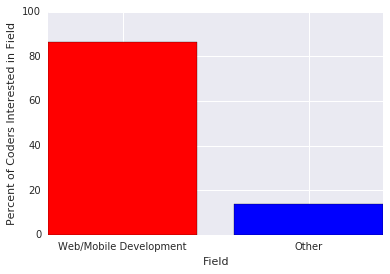

In [6]:
#what percent of people are interested in web or mobile development
womP = 0
for i in roleInterest.index.tolist():
    if ('Web Developer' in i) | ('Mobile Developer' in i):
        womP += roleInterest[i]
plt.bar(range(0,2),[100*womP,100-100*womP],color = ['red','blue'],width=0.8)
plt.gca().set_xticks([.4,1.4])
plt.gca().set_xticklabels(['Web/Mobile Development','Other'])
plt.gca().set_ylim(0,100)
plt.xlabel('Field')
plt.ylabel('Percent of Coders Interested in Field')
plt.show()

So we have shown that most new coders are interested in more than just one topic, therefore in order to be represetative, we have to include those with multiple interests.
A significant proportion of those involved overlap with our main areas of interest.
We can now proceed to look at the markets of interest.

In [7]:
#remove those who didn't report an interest as it's not relevant to our survey needs
sDclean = surveyData.iloc[surveyData['JobRoleInterest'].dropna().index,:].copy()
pd.concat([sDclean['CountryLive'].value_counts(),sDclean['CountryLive'].value_counts(normalize=True)],axis=1)

,CountryLive,CountryLive
United States of America,3125,0.457005
India,528,0.077216
United Kingdom,315,0.046066
Canada,260,0.038023
Poland,131,0.019158
Brazil,129,0.018865
Germany,125,0.018280
Australia,112,0.016379
Russia,102,0.014917
Ukraine,89,0.013016


While this indicates the number of respondants by company, and the united states and India are the the forerunners, to maximise the bang for our buck, we need to weight these numbers by how much they would be willing to spend for our services...

In [8]:
#spending per month
sDclean['USD/mth'] = sDclean['MoneyForLearning']/sDclean['MonthsProgramming'].replace({0:1})

In [9]:
from scipy.stats import mode
sDcleanC = sDclean[(~pd.isnull(sDclean['USD/mth']))]
sDcleanCD = sDcleanC[sDcleanC['CountryLive'].notnull()].copy()
sDgrpd = sDcleanCD.groupby('CountryLive').agg(['mean',np.median, mode])

In [10]:
sDgrpd.loc[['United States of America','India','United Kingdom','Canada'],['USD/mth']]

USD/mth                           
                                mean    median             mode
CountryLive                                                    
United States of America  227.997996  3.333333  ([0.0], [1314])
India                     135.100982  0.000000   ([0.0], [262])
United Kingdom             45.534443  0.000000   ([0.0], [142])
Canada                    113.510961  0.000000   ([0.0], [126])

Here we see that india spending far exceeds the UK which is surprising.  Also we didn't deal with people who spent nothing on coding.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


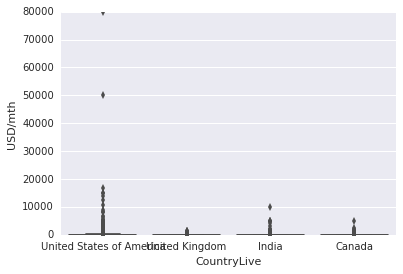

In [11]:
c4 = sDcleanCD[sDcleanCD['CountryLive'].str.contains('United States of America|India|Canada|United Kingdom')]
sns.boxplot(x='CountryLive',y='USD/mth',data=c4)
plt.show()

In [18]:
#remove all the zeros and the two >40000 USA
c4no0 = c4.drop(c4[c4['USD/mth']==0].index)
c4f = c4no0.drop(c4no0[c4no0['USD/mth']>20000].index)

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


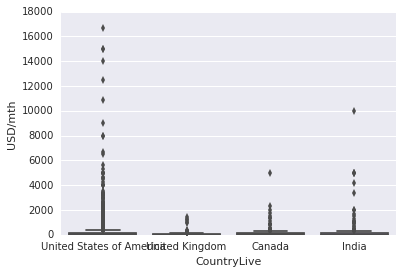

In [19]:
sns.boxplot(x='CountryLive',y='USD/mth',data=c4f)
plt.show()

In [25]:
c4fgrpd = c4f.groupby('CountryLive').agg(['count','mean',np.median, mode])
c4fgrpd['USD/mth']

,count,mean,median,mode
CountryLive,,,,
Canada,114,238.970444,25.000000,"([25.0], [6])"
India,201,311.202759,20.000000,"([166.66666666666666], [8])"
United Kingdom,137,92.730727,20.833333,"([8.333333333333334], [6])"
United States of America,1617,333.159012,33.333333,"([16.666666666666668], [69])"


In [29]:
print('Money spent on courses per month nationwide')
c4fgrpd['USD/mth']['count']*c4fgrpd['USD/mth']['mean']

Money spent on courses per month nationwide


CountryLive
Canada                       27242.630637
India                        62551.754651
United Kingdom               12704.109639
United States of America    538718.121808
dtype: float64

The USA is the obvious choice for advertisement.  The second choice likely India which has double the students and spends 2.5x as much as Canada on coursework.